In [ ]:
# 1. BASIC LIBRARIES INSTALLATION

#!pip install pandas
#!pip install numpy 
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib
#!pip install plotly
#!pip install scikit-learn
#!pip install ipywidgets

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as plt
import seaborn as sns
import plotly
import sklearn

In [4]:
# ====================== ANOVA ======================
from scipy.stats import f_oneway

# Define the data for different groups
group1 = [12,3,4,3,5,20,32]
group2 = [14,15,55,43,23,45]

# Perform ANOVA
f_statistic, p_value = f_oneway(group1, group2)

# Print the ANOVA results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 7.118134400805988
P-value: 0.021872647612093676


In [2]:
# ====================== LINEAR REGRESSION ======================
data = {'ID': [1,2,3,4,5,6,7,8,9,10], 
     'Age':[55, 28, 36, 32,20,22,60,43,42,39],
     'Sex':['female','female','male','female','male','male','male','female','male','male'],
     'Audit' : [1,3,3,5,4,7,8,9,9,10],
     'Income' : [1800,3000,2600,3700,5000,4000,3200,1900,3200,1800],
       'Social_score':[1,1,2,2,7,8,9,8,9,6]}
df = pd.DataFrame(data)
df

,ID,Age,Sex,Audit,Income,Social_score
0,1,55,female,1,1800,1
1,2,28,female,3,3000,1
2,3,36,male,3,2600,2
3,4,32,female,5,3700,2
4,5,20,male,4,5000,7
5,6,22,male,7,4000,8
6,7,60,male,8,3200,9
7,8,43,female,9,1900,8
8,9,42,male,9,3200,9
9,10,39,male,10,1800,6


In [3]:
# Making linear regression object
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm

LinearRegression()

In [6]:
X = df[['Income']] # X is independent/predictor variable
Y = df['Audit']    # Y is dependent/outcome variable

In [7]:
lm.fit(X,Y) # fit the model

LinearRegression()

In [8]:
Yhat=lm.predict(X) # Generate a prediction
Yhat[0:10]  

array([6.34494703, 5.90729421, 6.05317848, 5.65199674, 5.17787286,
       5.54258354, 5.83435208, 6.30847596, 5.83435208, 6.34494703])

In [12]:
lm.intercept_
lm.coef_

print("intercept :",lm.intercept_) 
print("coefficient:",lm.coef_)

intercept : 6.993683781581092
coefficient: [-0.00052771]


In [ ]:
# Final Linear Regression Model with (𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋)
# Audit = 6.993 - 0.0005 x Income

In [21]:
# ====================== MULTIPLE LINEAR REGRESSION ======================
# Making multiple linear regression model
multi = df[['Income', 'Age','Social_score']] # multi is independent/predictor variables 
lm.fit(multi, df['Audit'])    # Audit is dependent/outcome variable

LinearRegression()

In [22]:
lm.intercept_
lm.coef_

print("intercept :",lm.intercept_) 
print("coefficient:",lm.coef_)

intercept : 11.814615602882819
coefficient: [-0.00137262 -0.12119498  0.43391625]


In [ ]:
# Final multiple linear regression model with (𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3)
# Audit = 11.815 - 0.0014 x Income - 0.1212 x Age + 0.4339 x Social_score

(0.0, 10.79709590517241)

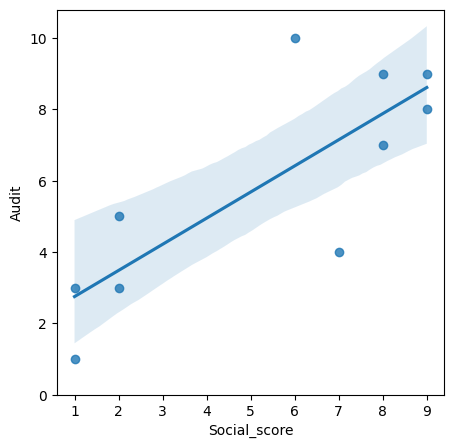

In [34]:
# ====================== MODEL EVALUATION WITH VISUALIZATION ====================== 
#1) regression plot (check model fitting with actual data, outliers...)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Social_score", y="Audit", data=df)
plt.ylim(0,)

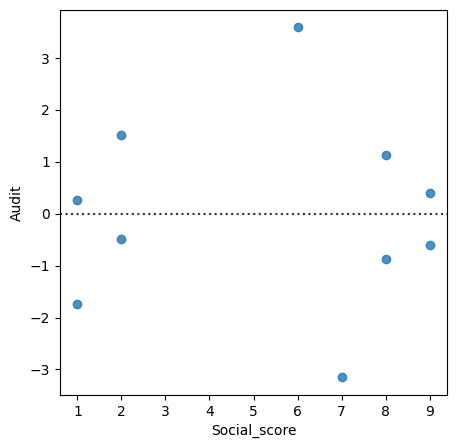

In [36]:
#2) residual plot (Residual = the distance between actual value and predicted value)
# X axis = independent variable, Y axis = residual
# residual plot points should be randomly scattered around X axis
# If not randomly scattered, non-linear model may be more appropriate. 
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['Social_score'], y=df['Audit'])
plt.show()

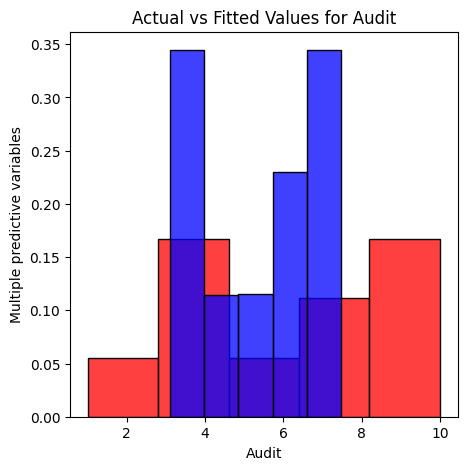

In [50]:
# 3-1) Distribution histogram (for multiple linear regression)
# Comparer the distribution of fitted values generated by model and the distribution of actual values
# Similar distribution line means a good model fitting.

Y_hat = lm.predict(multi)
plt.figure(figsize=(width, height))
ax1 = sns.histplot(df['Audit'], kde=False, stat="density", color="r", label="Actual Value")
sns.histplot(Y_hat, color="b", kde=False, stat="density", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Audit')
plt.xlabel('Audit')
plt.ylabel('Multiple predictive variables')

plt.show()
plt.close()

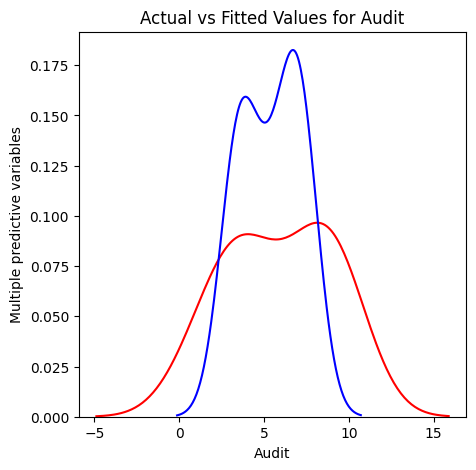

In [48]:
# 3-2) Distribution plot (for multiple linear regression)
# Comparer the distribution of fitted values generated by model and the distribution of actual values
# Similar distribution histogram means a good model fitting.

Y_hat = lm.predict(multi)
plt.figure(figsize=(width, height))
ax1 = sns.kdeplot(df['Audit'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Audit')
plt.xlabel('Audit')
plt.ylabel('Multiple predictive variables')

plt.show()
plt.close()

In [78]:
# ====================== POLYNOMIAL FITTING FOR LINEAR REGRESSION ======================
#1) Making a model
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 10, 200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit for Audit ~ Social_score')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Audit')

    plt.show()
    plt.close()

In [79]:
x = df['Social_score']
y = df['Audit']

In [80]:
# 2) polynomial fitting with the 3rd order
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

         3         2
0.04627 x - 0.833 x + 4.957 x - 2.456


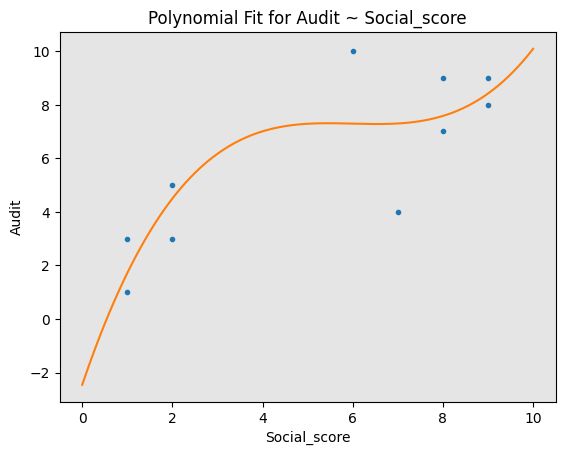

array([ 0.04627272, -0.83299822,  4.95690778, -2.45600628])

In [82]:
PlotPolly(p, x, y, 'Social_score')
np.polyfit(x, y, 3)

In [84]:
#  ====================== PIPELINE FOR REGRESSION MODEL AND FITTING AT ONCE  ====================== 
#1) Making a Pipeline 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# StandardScaler = for data standalization with z-score
# PolynomialFeatures = for polynomial fitting
# LinearRegression = is a model

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [89]:
#2) Applying data to the pipeline

multi_f = multi.astype(float) # transforming multi datatype as floats for standandization
y = df['Audit']               # y is dependent variable
pipe.fit(multi_f,y)           # apply data into pipeline 

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [87]:
ypipe=pipe.predict(multi_f)
ypipe[0:3]

array([1., 3., 3.])

In [50]:
#  ====================== GOODNESS OF FIT FOR MODEL ====================== 

# R^2 for general linear regression
X = df[['Social_score']]
Y = df['Audit']
Multi = df[['Social_score','Age','Income']]

lm.fit(X, Y)
print('The R-square: ', lm.score(X, Y))

The R-square:  0.6435444806655546


In [52]:
# R^2 for multiple linear regression
lm.fit(Multi, Y)
print('The R-square: ', lm.score(Multi, df['Audit']))

The R-square:  0.7939117614342549


In [45]:
# R^2 for polynomial regression model

from sklearn.metrics import r2_score
x = df['Social_score']
y = df['Audit']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

r_squared = r2_score(y, p(x))
print('The R-square: ', r_squared)

The R-square:  0.7039693055451238


In [51]:
# Mean Squared Error for general linear regression

from sklearn.metrics import mean_squared_error

Yhat=lm.predict(X)
mse = mean_squared_error(df['Audit'], Yhat)  # Mean sqaured error between actual Audit values and Audit values predicted by lm model with X (Social_score) variable
print('The MSE:', mse)

The MSE: 3.0975984630163302


In [53]:
# Mean Squared Error for multiple linear regression

Y_multi = lm.predict(Multi)

print('The MSE:', \
      mean_squared_error(df['Audit'], Y_multi))

The MSE: 1.7909067931363254


In [48]:
# # Mean Squared Error for polynomial regression

mse = mean_squared_error(df['Audit'], p(x))
print('The MSE:', mse)

The MSE: 2.5725067348128743


In [ ]:
#  ====================== PREDICTION WITH TEST DATA ====================== 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Using the above best model, generating a prediction

# 1) make a simpe test dataset or input test dataset
test_data=np.arange(1, 15, 1).reshape(-1, 1)

# 2) Model 
lm.fit(X, Y)

yhat=lm.predict(test_data)
yhat[0:5]

plt.plot(test_data, yhat)
plt.show()

In [59]:
# ====================== MODEL TEST AND TRAINING ======================

# 1) Automatical split training data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) # 10% for testing, 90% is for training

print("number of test data :", x_test.shape[0])
print("number of training data:",x_train.shape[0])

In [ ]:
# 2) Polynomial fitting
pr = PolynomialFeatures(degree=2) # degree means the number of polynomial order 
x_train_pr = pr.fit_transform(x_train[['Social_score']])
x_test_pr = pr.fit_transform(x_test[['Social_score']])
pr

# 3) Input data into regression model
trainlm = lm.fit(x_train,y_train)
testlm = lm.fit(x_test,y_text)

# 4) Generate a prediction
yhat = lm.predict(x_test)
yhat[0:5]

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

# Result display as a plot
PollyPlot(x_train[['Social_score']], x_test[['Social_score']], y_train, y_test, lm, pr)

In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cross = cross_val_score(lm, x_data[['Audit']], y_data, cv=3) 
print("The mean of the folds :", cross.mean(), " & the standard deviation :" , cross.std())

#lm is a regression model, x_data is a predictive variable, y_data is a target data (what we want to predict), cv is the number of folds (number of splited groups)

In [ ]:
# Selecting the best number of polynomial order

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Social_score']])
    
    x_test_pr = pr.fit_transform(x_test[['Social_score']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [ ]:
# ====================== RIDGE REGRESSION ======================

#1) making ridge regression function
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=1) #alpha=1 means alpha = 0.1

#2) input training data into the function
RigeModel.fit(x_train_pr, y_train)  #x_train_pr means polynominal fitted x data / y_train is the original data

#3) get a prediction with test data
yhat = RigeModel.predict(x_test_pr)


#4) select the value of alpha that minimizes the test error
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
    
    
    
#5) make a plot
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
# ====================== GRID SEARCH TO FIND THE BEST ALPHA ======================

#1) make parameters
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

#2) make a ridge regression object
RR=Ridge()

#3) make a gridsearch object
Grid1 = GridSearchCV(RR, parameters1,cv=4, iid=None) #cv is the number of folders

#4) input data
Grid1.fit(x_data, y_data)

#5) Find the best estimator
BestRR=Grid1.best_estimator_
BestRR

#6) R^2 with test data
BestRR.score(x_test, y_test)